In [2]:
!pip install catboost


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 43.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2


In [4]:
pip install --upgrade numpy catboost


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.4 MB/s eta 0:00:00


In [1]:
!pip uninstall -y numpy catboost
!pip install numpy==1.23.5 catboost==1.2


Found existing installation: numpy 1.23.5
Uninstalling numpy-1.23.5:
  Successfully uninstalled numpy-1.23.5
Found existing installation: catboost 1.2
Uninstalling catboost-1.2:
  Successfully uninstalled catboost-1.2
  Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.3 kB)
  Using cached catboost-1.2-cp311-cp311-manylinux2014_x86_64.whl.metadata (1.2 kB)
Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
Using cached catboost-1.2-cp311-cp311-manylinux2014_x86_64.whl (98.5 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.23.5 which is incompatible.
albucore 0.0.23 requires numpy>=1.24.4, but you have numpy 1.23.5 which is inc

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from scipy.cluster.hierarchy import linkage, dendrogram
from pandas.plotting import andrews_curves
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import StackingClassifier
# Column Transformer
from sklearn.compose import ColumnTransformer
# Pipeline
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
# Metrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix,classification_report
from sklearn.utils.class_weight import compute_class_weight
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
!pip install colorama


In [5]:
import pandas as pd
from io import StringIO
from IPython.display import display, HTML
from colorama import Fore, Style

from colorama import Fore, Style

# Define the functions
def styled_heading(text, background_color='#282828', text_color='#FFD700'):
    return f"""
    <div style="
        text-align: center;
        background: {background_color};
        font-family: 'Montserrat', sans-serif;
        color: {text_color};
        padding: 15px;
        font-size: 24px;
        font-weight: bold;
        line-height: 1.5;
        border-radius: 15px;
        margin: 20px 10px;
        box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.3);
        border: 2px solid {text_color};
        max-width: 100%;
        word-wrap: break-word;
    ">
        {text}
    </div>
    <style>
    @media (max-width: 600px) {{
        div {{
            font-size: 20px;
            padding: 10px;
        }}
    }}
    </style>
    """

def print_error(message):
    display(HTML(styled_heading("Error", background_color='#B22222', text_color='white')))
    print(f"An error occurred: {message}")

def data_peek(df):
    try:
        # Display head and tail of the dataset
        for heading, df_part, bg_color, text_color in zip(
            ["The Head Of Dataset is:", "The Tail Of Dataset is:", "Numerical Summary of Data:"],
            [df.head(5), df.tail(5), df.describe()],
            ['#4B0082', '#006400', '#8B4513'],
            ['#FFFFFF', '#FFD700', '#FFFFFF']
        ):
            display(HTML(styled_heading(heading, background_color=bg_color, text_color=text_color)))
            display(HTML(df_part.to_html(index=False)))
            print()

        # Print shape data
        display(HTML(styled_heading("Shape Data:", background_color='#4682B4', text_color='#FFFFFF')))
        print(f'{Fore.CYAN}Shape of the Data: {Style.BRIGHT + str(df.shape) + Style.RESET_ALL}')
        print(f'{Fore.CYAN}Rows: {df.shape[0]}{Style.RESET_ALL}')
        print(f'{Fore.CYAN}Columns: {df.shape[1]}{Style.RESET_ALL}')
        print()

        # Print info of the data
        display(HTML(styled_heading("Info Of Data:", background_color='#2E8B57', text_color='#FFFFFF')))
        buffer = StringIO()
        df.info(buf=buffer)
        buffer.seek(0)
        info_str = buffer.read()
        display(HTML(f"<pre style='margin-bottom: 20px; font-family: Courier, monospace; font-size: 14px;'>{info_str}</pre>"))
        print()

        # Print categorical columns
        cat_cols = [col for col in df.columns if df[col].dtype == 'O']
        display(HTML(styled_heading("Categorical Columns of Data:", background_color='#D2691E', text_color='#FFFFFF')))
        print(f'{Fore.LIGHTMAGENTA_EX}The Categorical Columns of Data are:{Style.RESET_ALL} {cat_cols}')
        print()

        # Print numerical columns
        num_cols = [col for col in df.columns if df[col].dtype in ['float64', 'int64']]
        display(HTML(styled_heading("Numerical Columns of Data:", background_color='#8A2BE2', text_color='#FFFFFF')))
        print(f'{Fore.LIGHTMAGENTA_EX}The Numerical Columns of Data are:{Style.RESET_ALL} {num_cols}')
        print()

        # Print null values
        display(HTML(styled_heading("Null Values in Data:", background_color='#FF4500', text_color='#FFFFFF')))
        null_values = df.isnull().sum()
        display(HTML(f"<pre style='margin-bottom: 20px; font-family: Courier, monospace; font-size: 14px;'>{null_values}</pre>"))
        print()

        # Print duplicates check
        display(HTML(styled_heading("Duplicates Check in Data:", background_color='#4169E1', text_color='#FFFFFF')))
        duplicates_count = df.duplicated().sum()
        if duplicates_count > 0:
            print(f'{Fore.RED}Duplicates exist in the dataset. Total duplicates: {duplicates_count}{Style.RESET_ALL}')
        else:
            print(f'{Fore.GREEN}No duplicates found in the dataset.{Style.RESET_ALL}')
        print()

    except Exception as e:
        print_error(str(e))

# Load a sample dataset
df = pd.read_csv('/content/liver_cirrhosis.csv')

# Get an overview of the dataset
data_peek(df)


N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
2221,C,Placebo,18499,F,N,Y,N,N,0.5,149.0,4.04,227.0,598.0,52.70,57.0,256.0,9.9,1
1230,C,Placebo,19724,M,Y,N,Y,N,0.5,219.0,3.93,22.0,663.0,45.00,75.0,220.0,10.8,2
4184,C,Placebo,11839,F,N,N,N,N,0.5,320.0,3.54,51.0,1243.0,122.45,80.0,225.0,10.0,2
2090,D,Placebo,16467,F,N,N,N,N,0.7,255.0,3.74,23.0,1024.0,77.50,58.0,151.0,10.2,2
2105,D,Placebo,21699,F,N,Y,N,N,1.9,486.0,3.54,74.0,1052.0,108.50,109.0,151.0,11.5,1


N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
3584,D,D-penicillamine,23612,F,N,N,N,N,0.8,231.000000,3.87,173.0,9009.8,127.71,96.000000,295.0,11.0,2
3584,D,D-penicillamine,23612,F,N,N,N,N,0.8,231.000000,3.87,173.0,9009.8,127.71,96.000000,295.0,11.0,2
971,D,D-penicillamine,16736,F,N,Y,Y,Y,5.1,369.510563,3.23,18.0,790.0,179.80,124.702128,104.0,13.0,3
3707,C,D-penicillamine,16990,F,N,Y,N,N,0.8,315.000000,4.24,13.0,1637.0,170.50,70.000000,426.0,10.9,2
3707,C,D-penicillamine,16990,F,N,Y,N,N,0.8,315.000000,4.24,13.0,1637.0,170.50,70.000000,426.0,10.9,2


N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.00000
1887.117040,18495.877080,3.402644,372.331471,3.486578,100.184663,1995.675597,123.166345,123.822548,256.007337,10.734549,2.00116
1091.690918,3737.596616,4.707491,193.668452,0.380488,73.184840,1798.885660,47.747616,52.786350,98.679006,0.904436,0.81387
41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.00000
1080.000000,15694.000000,0.800000,275.000000,3.290000,52.000000,1032.000000,92.000000,92.000000,189.000000,10.000000,1.00000
1680.000000,18499.000000,1.300000,369.510563,3.510000,97.648387,1828.000000,122.556346,124.702128,251.000000,10.600000,2.00000
2576.000000,20955.000000,3.400000,369.510563,3.750000,107.000000,1982.655769,134.850000,127.000000,311.000000,11.100000,3.00000
4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,3.00000


Shape of the Data: (25000, 19)
Rows: 25000
Columns: 19



The Categorical Columns of Data are: ['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']



The Numerical Columns of Data are: ['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage']



Duplicates exist in the dataset. Total duplicates: 15361



In [6]:
# Check the number of duplicate rows
num_duplicates = df.duplicated().sum()
print(f'Number of duplicate rows: {num_duplicates}')

# Drop the duplicate rows
df_cleaned = df.drop_duplicates()

# Verify if duplicates are dropped
num_duplicates_after = df_cleaned.duplicated().sum()
print(f'Number of duplicate rows after dropping: {num_duplicates_after}')


Number of duplicate rows: 15361
Number of duplicate rows after dropping: 0


In [7]:
# Binning/Discretization of Age
bins = [0, 25, 35, 45, 100]  # Define age bins
labels = ['Young', 'Adult', 'Middle-aged', 'Senior']  # Define labels for bins
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels)


In [8]:
!pip install joypy

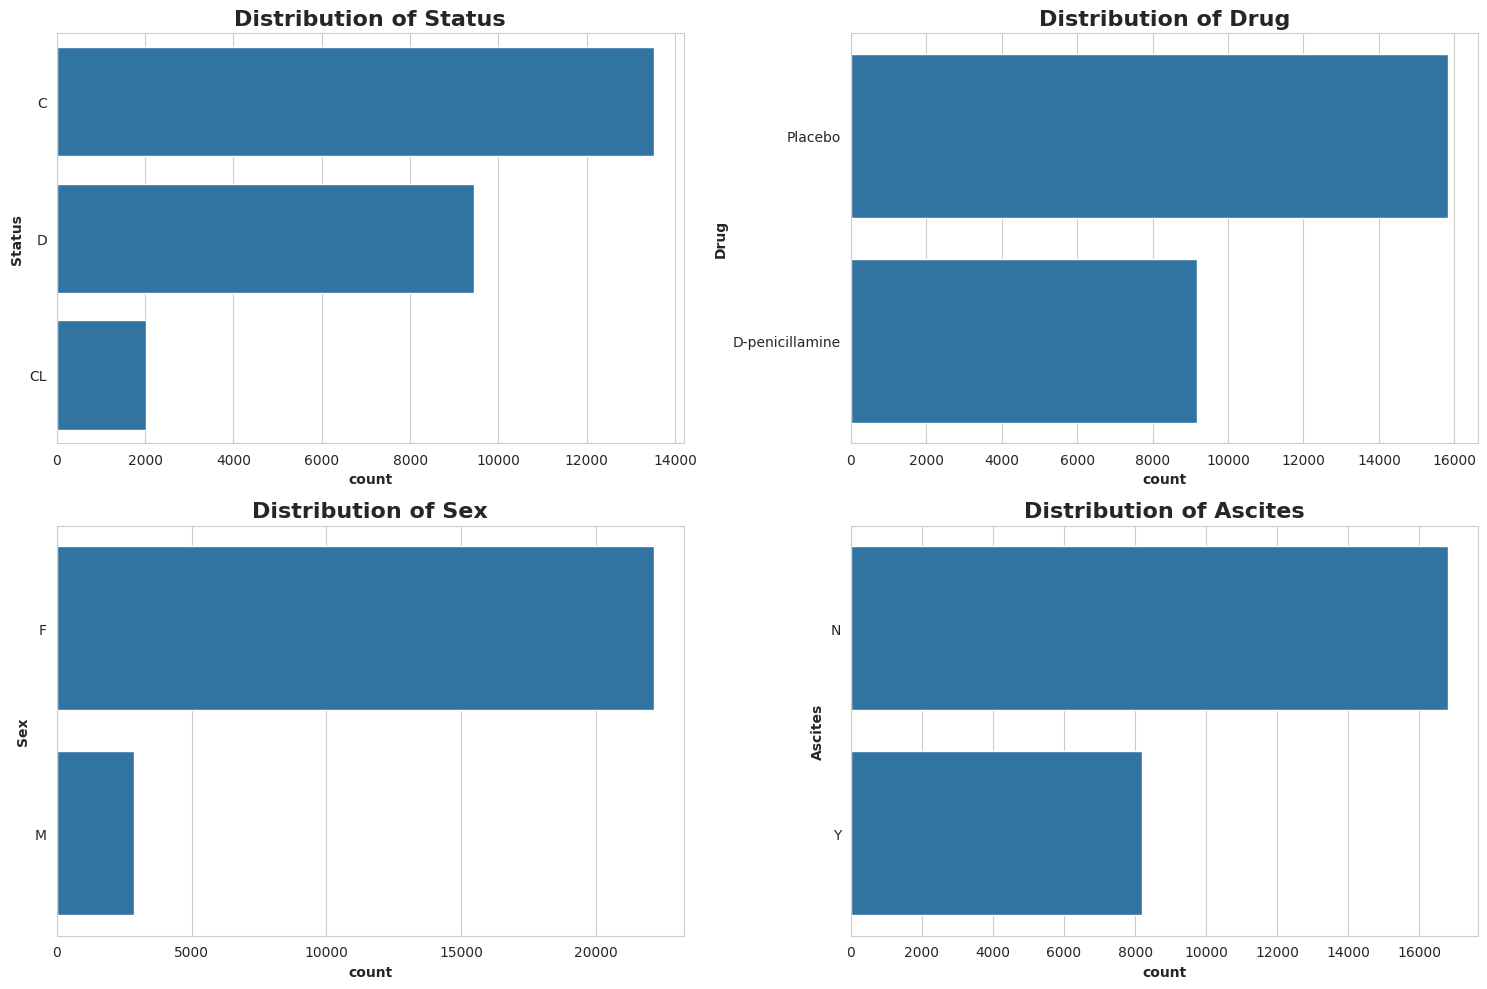

In [9]:
# Set the style for seaborn
sns.set_style("whitegrid")

# Create a figure and subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot for 'Status'
sns.countplot(y='Status', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Status', fontweight='bold', fontsize=16)
axes[0, 0].set_xlabel(axes[0, 0].get_xlabel(), fontweight='bold')
axes[0, 0].set_ylabel(axes[0, 0].get_ylabel(), fontweight='bold')

# Plot for 'Drug'
sns.countplot(y='Drug', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Drug', fontweight='bold', fontsize=16)
axes[0, 1].set_xlabel(axes[0, 1].get_xlabel(), fontweight='bold')
axes[0, 1].set_ylabel(axes[0, 1].get_ylabel(), fontweight='bold')

# Plot for 'Sex'
sns.countplot(y='Sex', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Sex', fontweight='bold', fontsize=16)
axes[1, 0].set_xlabel(axes[1, 0].get_xlabel(), fontweight='bold')
axes[1, 0].set_ylabel(axes[1, 0].get_ylabel(), fontweight='bold')

# Plot for 'Ascites'
sns.countplot(y='Ascites', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Ascites', fontweight='bold', fontsize=16)
axes[1, 1].set_xlabel(axes[1, 1].get_xlabel(), fontweight='bold')
axes[1, 1].set_ylabel(axes[1, 1].get_ylabel(), fontweight='bold')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


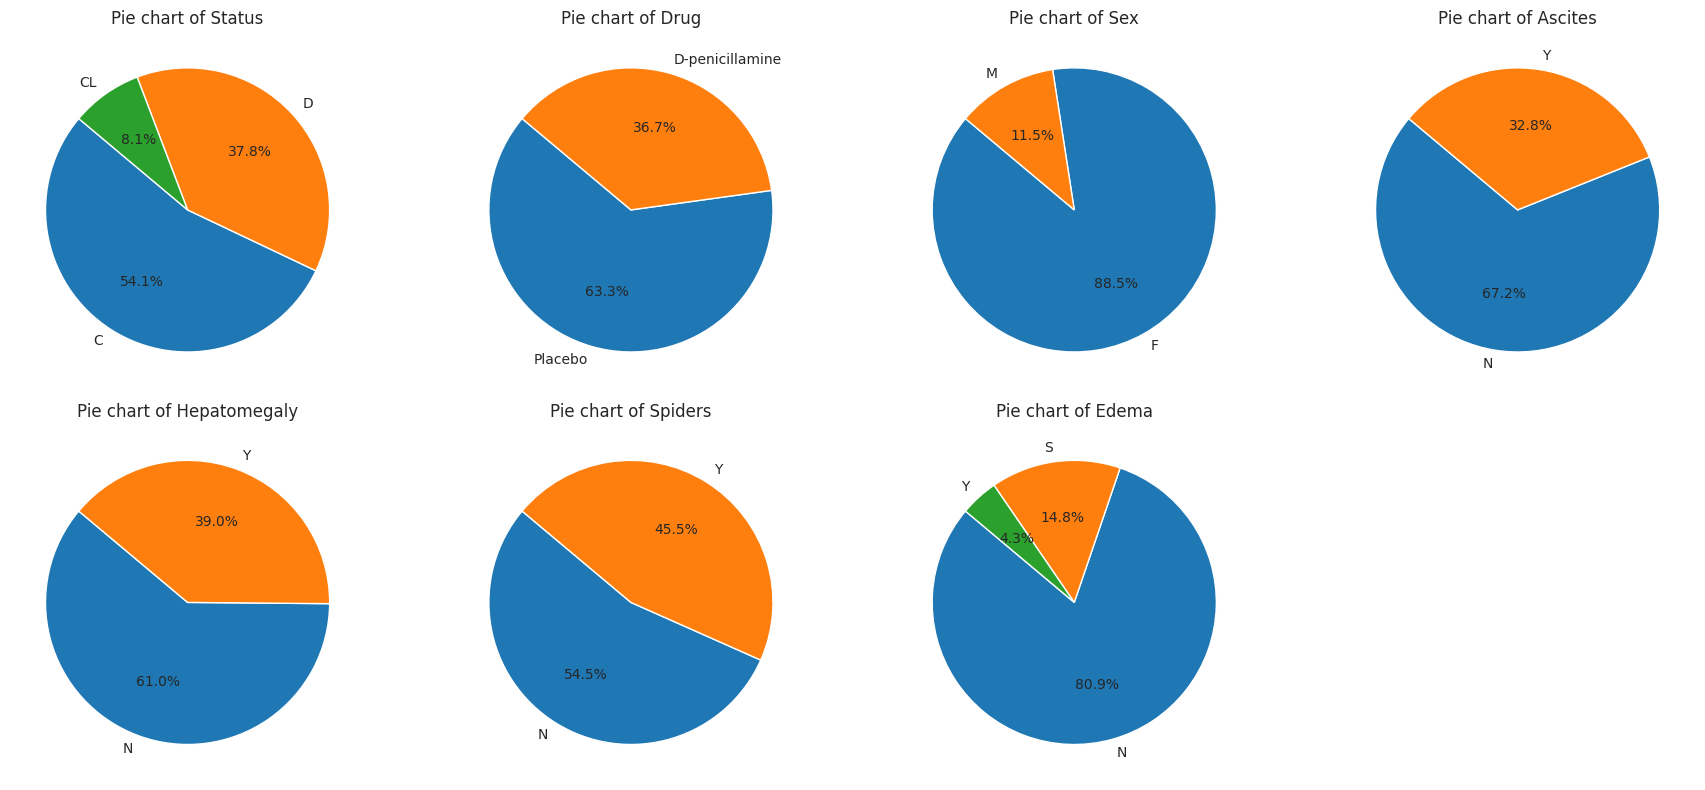

In [10]:
# Define the categorical columns
categorical_columns = ['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']

# Create subplots
fig, axs = plt.subplots(2, 4, figsize=(18, 8))

# Flatten the axs array for easy iteration
axs = axs.flatten()

# Plot each categorical variable
for i, column in enumerate(categorical_columns):
    # Pie chart
    if len(df[column].unique()) <= 5:
        axs[i].pie(df[column].value_counts(), labels=df[column].value_counts().index, autopct='%1.1f%%', startangle=140)
        axs[i].set_title(f'Pie chart of {column}')
    # Donut chart
    elif len(df[column].unique()) > 5 and len(df[column].unique()) <= 10:
        axs[i].pie(df[column].value_counts(), labels=df[column].value_counts().index, autopct='%1.1f%%', startangle=140)
        axs[i].add_artist(plt.Circle((0,0),0.70,fc='white'))
        axs[i].set_title(f'Donut chart of {column}')
    # Violin swarm plot
    elif len(df[column].unique()) > 10:
        sns.violinplot(x=column, data=df, ax=axs[i])
        sns.swarmplot(x=column, data=df, color='k', alpha=0.5, ax=axs[i])
        axs[i].set_title(f'Violin Swarm Plot of {column}')
    # Strip plot
    else:
        sns.stripplot(x=column, data=df, ax=axs[i])
        axs[i].set_title(f'Strip Plot of {column}')

# Hide any extra subplots if there are fewer than 8 categorical columns
for j in range(len(categorical_columns), len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()


<Figure size 1200x800 with 0 Axes>

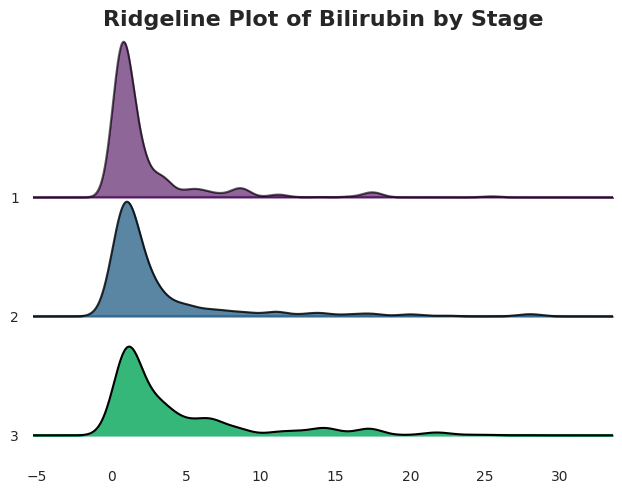

In [11]:
import joypy

plt.figure(figsize=(12, 8))
joypy.joyplot(data=df, by='Stage', column='Bilirubin', colormap=plt.cm.viridis, fade=True)
plt.title('Ridgeline Plot of Bilirubin by Stage', fontsize=16, fontweight='bold')
plt.show()


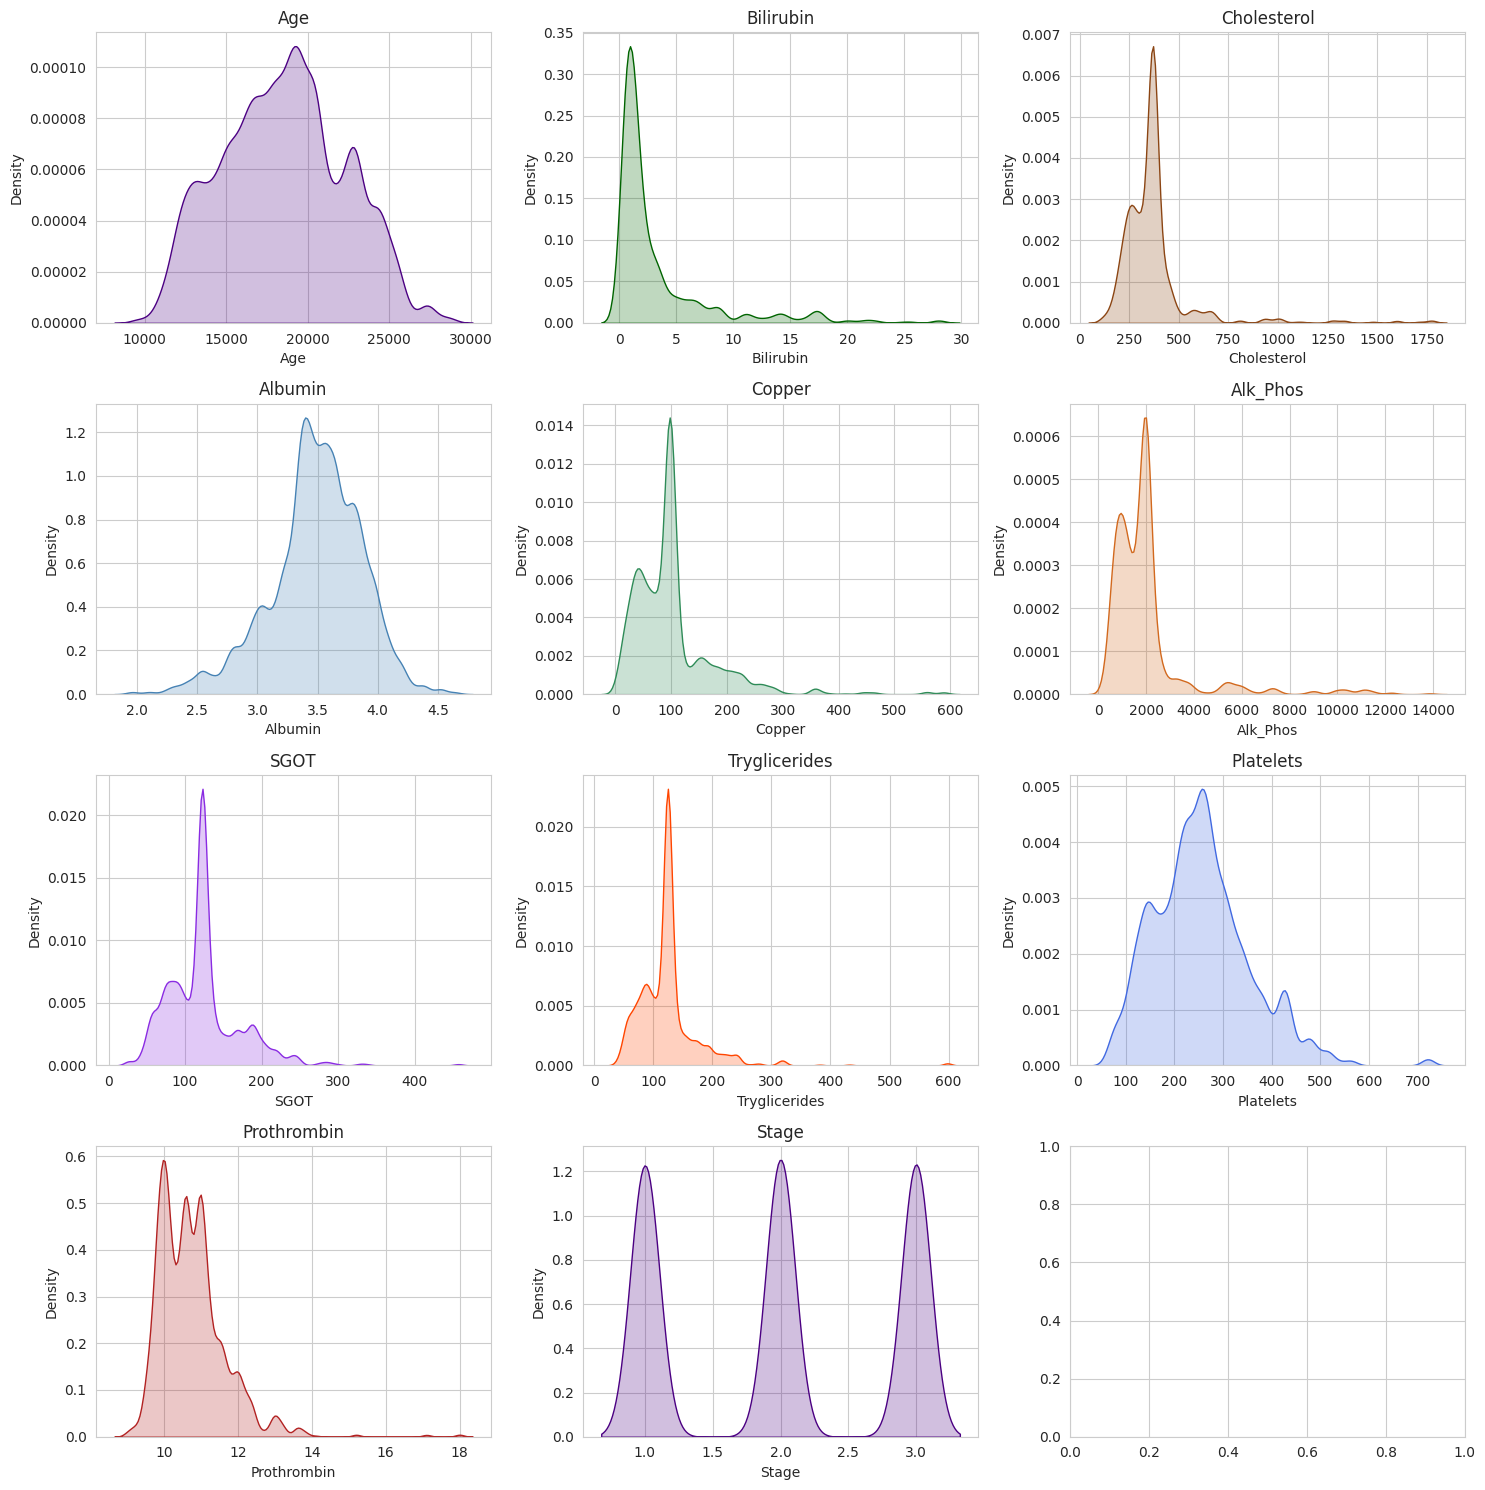

In [12]:
# Define color palette
colors = ['#4B0082', '#006400', '#8B4513', '#4682B4', '#2E8B57', '#D2691E', '#8A2BE2', '#FF4500', '#4169E1', '#B22222']

columns = ['Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage']
num_rows = 4
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))
axes = axes.flatten()

for i, column in enumerate(columns):
    ax = axes[i]
    color = colors[i % len(colors)]  # Reuse colors if there are more columns than colors
    sns.kdeplot(data=df[column], ax=ax, fill=True, color=color)
    ax.set_title(column)
    ax.set_ylabel('Density')

plt.tight_layout()
plt.show()

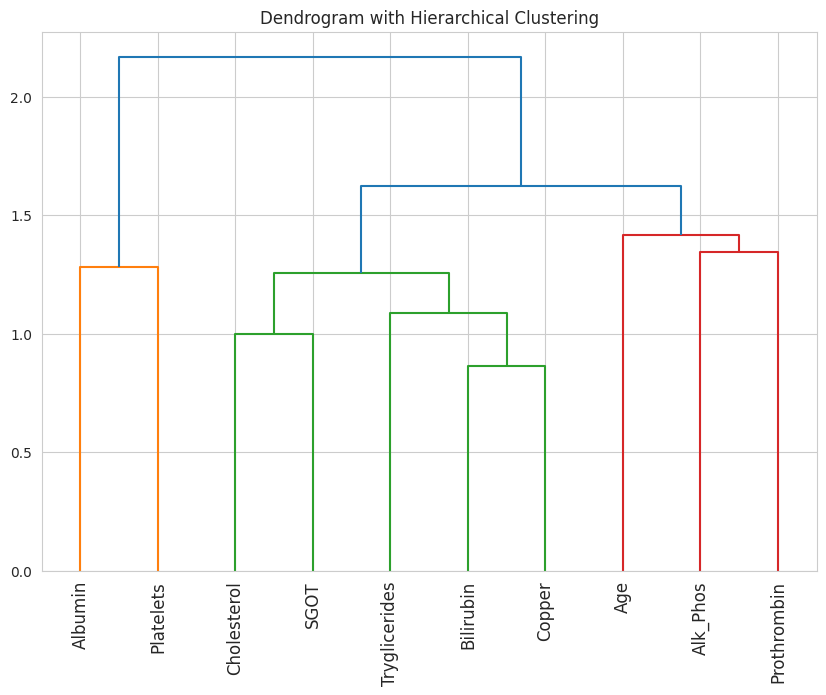

In [13]:
# Compute the correlation matrix
corr = df[['Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']].corr()

# Generate the linkage matrix
link = linkage(corr, method='complete')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(link, labels=corr.columns, leaf_rotation=90)
plt.title('Dendrogram with Hierarchical Clustering')
plt.show()

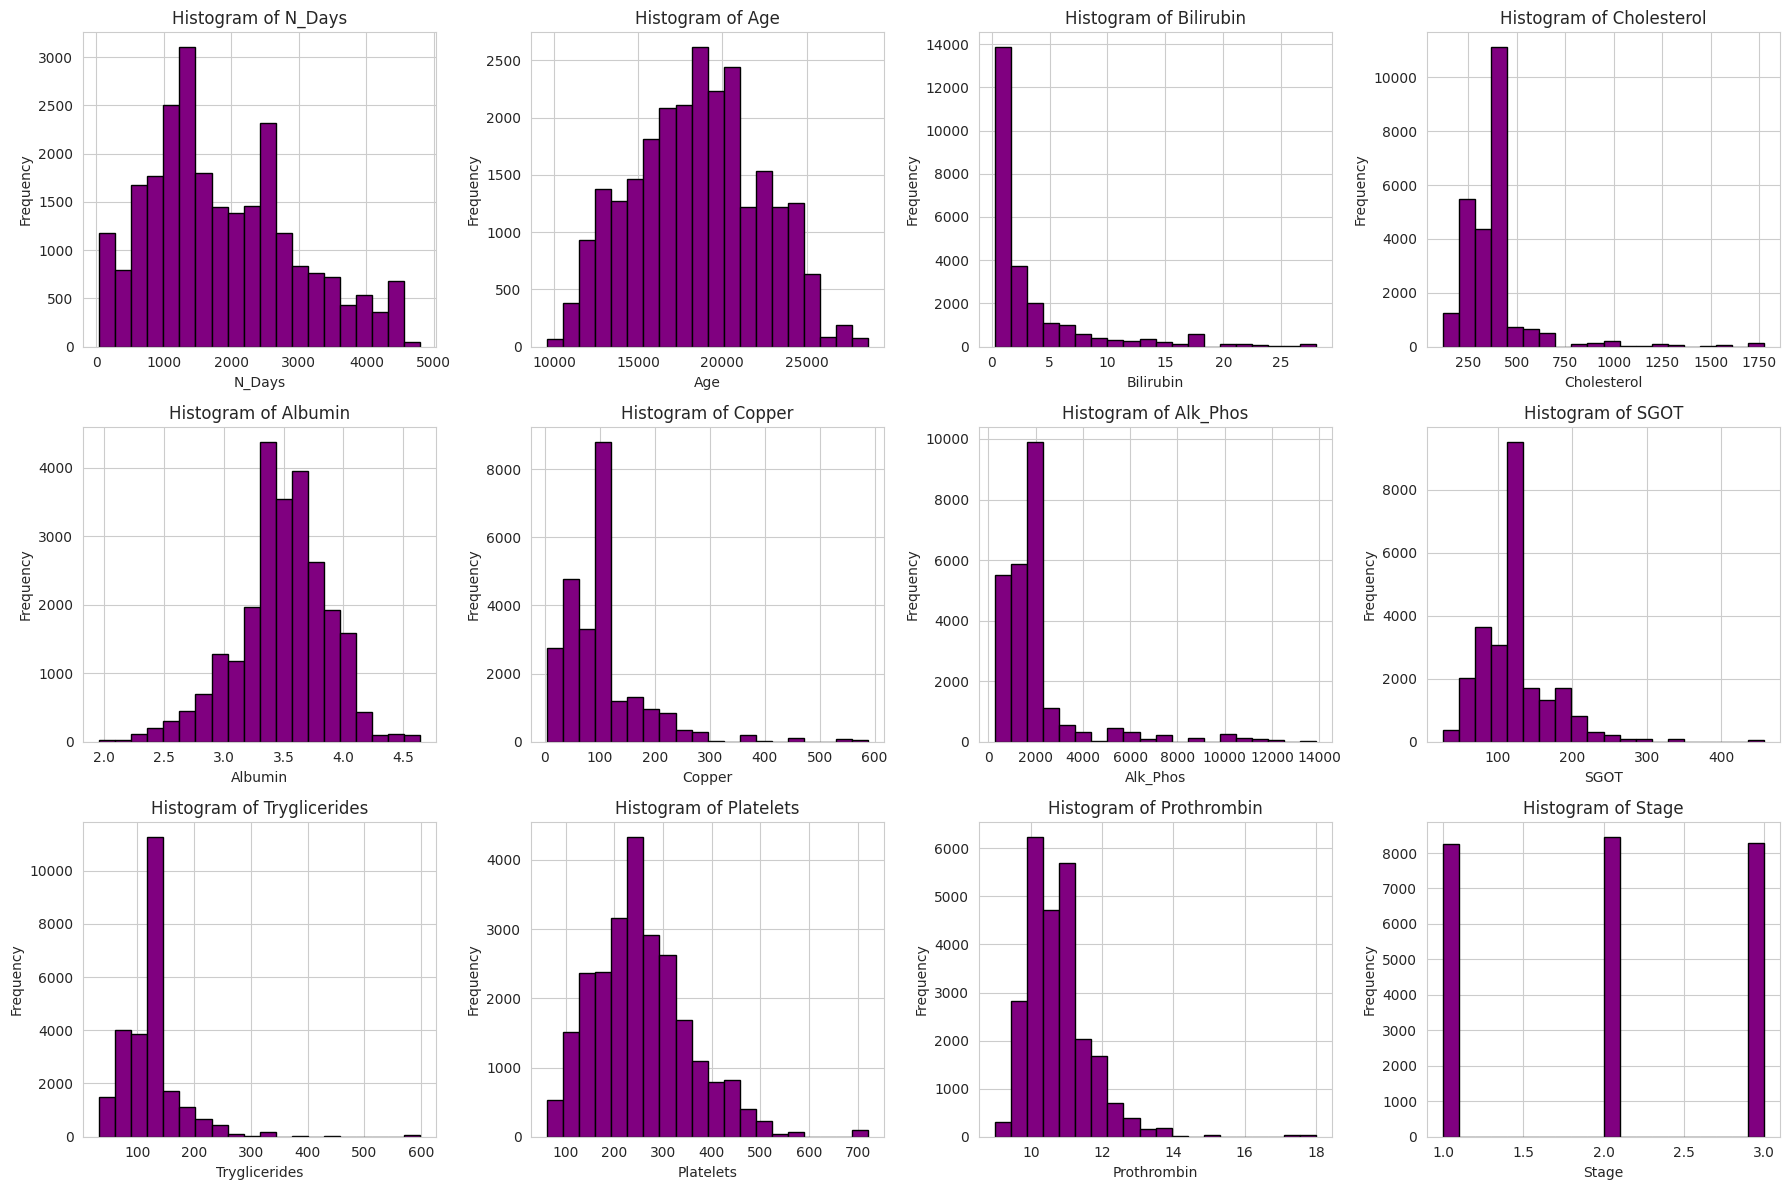

In [14]:
# Define the numeric columns
numeric_columns = ['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
                   'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage']

# Create subplots
fig, axs = plt.subplots(3, 4, figsize=(18, 12))

# Flatten the axs array for easy iteration
axs = axs.flatten()

# Plot histogram for each numeric variable
for i, column in enumerate(numeric_columns):
    axs[i].hist(df[column], bins=20, color='purple', edgecolor='black')
    axs[i].set_title(f'Histogram of {column}')
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('Frequency')

# Hide any extra subplots if there are fewer than 12 numeric columns
for j in range(len(numeric_columns), len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

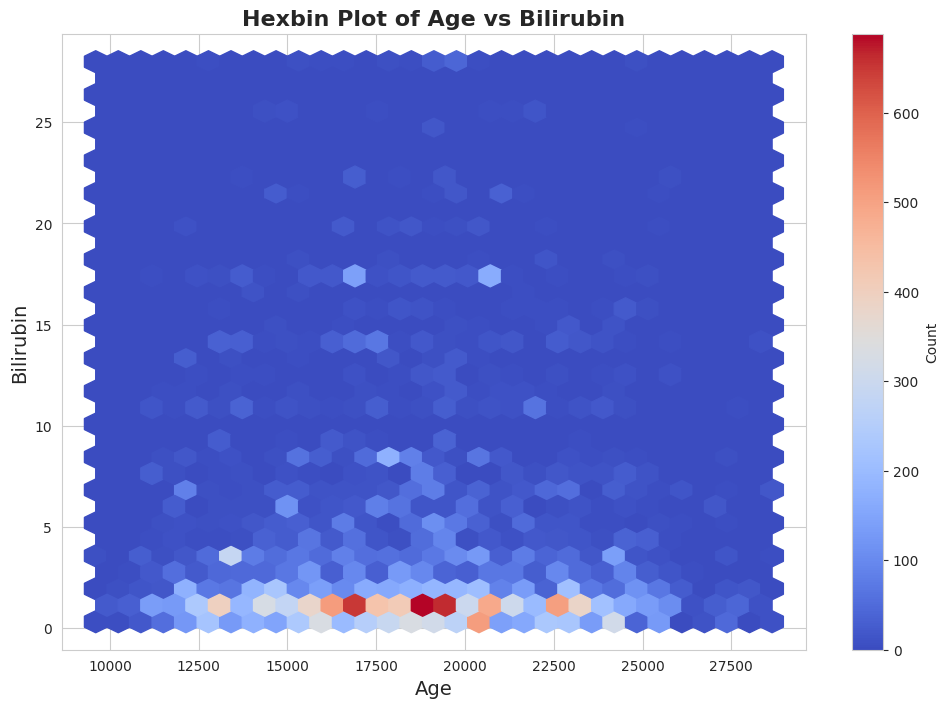

In [15]:
plt.figure(figsize=(12, 8))
plt.hexbin(df['Age'], df['Bilirubin'], gridsize=30, cmap='coolwarm')
plt.colorbar(label='Count')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Bilirubin', fontsize=14)
plt.title('Hexbin Plot of Age vs Bilirubin', fontsize=16, fontweight='bold')
plt.show()

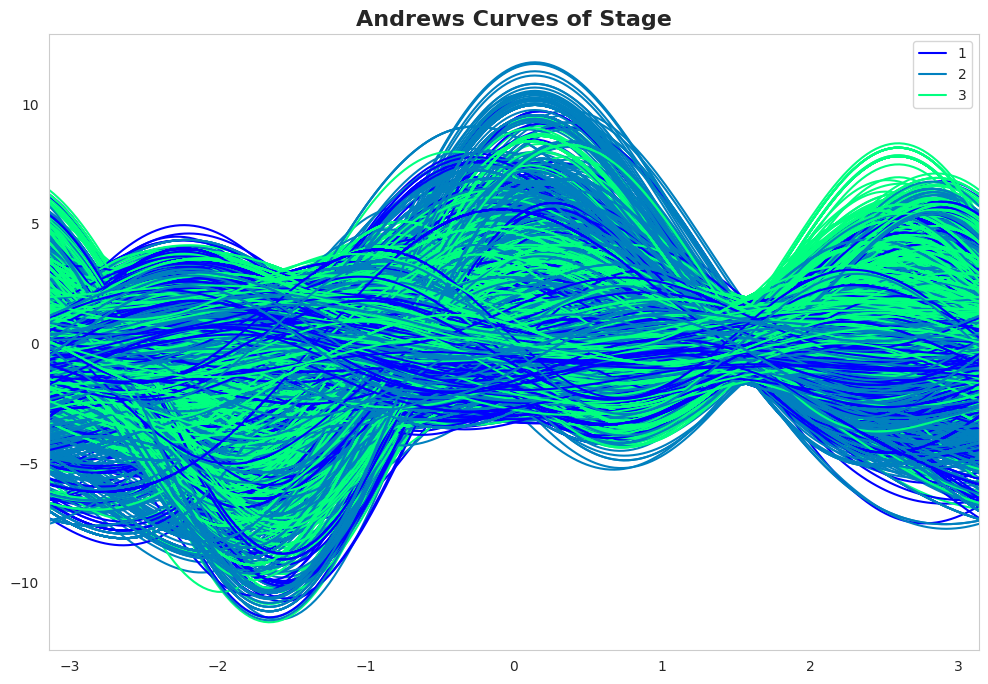

In [20]:
plt.figure(figsize=(12, 8))
andrews_curves(df[['Stage', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin']], 'Stage', colormap='winter')
plt.title('Andrews Curves of Stage', fontsize=16, fontweight='bold')
plt.show()


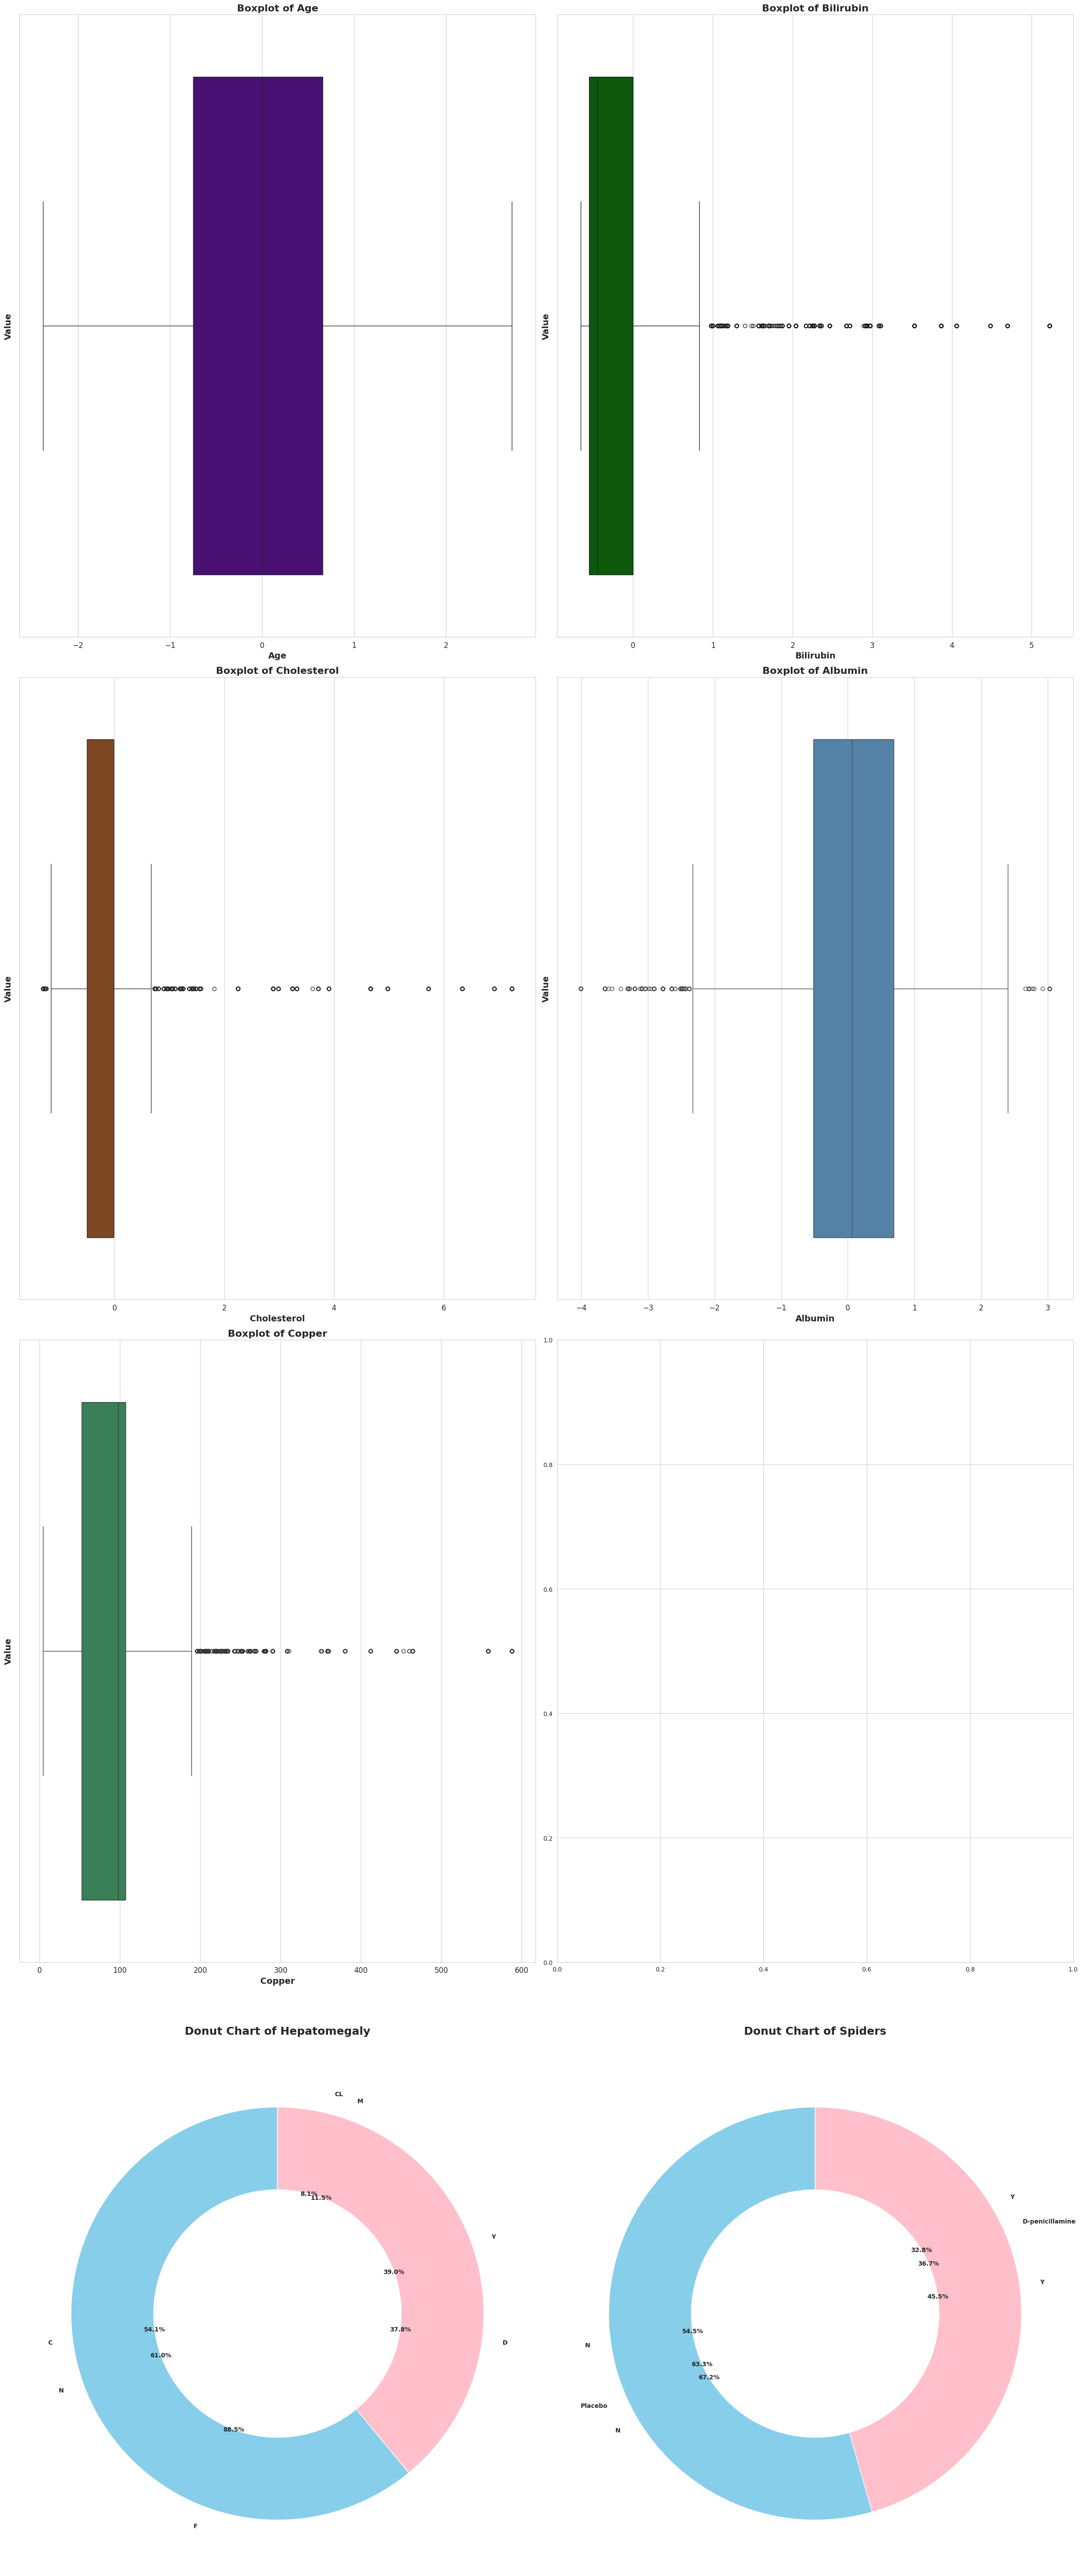

In [19]:
# Define colors
colors = ['#4B0082', '#006400', '#8B4513', '#4682B4', '#2E8B57', '#87CEEB', '#FFC0CB']

# Selecting columns
numerical_columns = ['Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper']
categorical_columns = ['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders']

# Set the style for seaborn
sns.set_style("whitegrid")

# Calculate the number of subplot rows needed for numerical columns
num_numerical_cols = len(numerical_columns)
num_subplot_rows = (num_numerical_cols + 1) // 2  # Ensure at least one row

# Create a figure and subplots
fig, axes = plt.subplots(num_subplot_rows + 1, 2, figsize=(25, 15 * (num_subplot_rows + 1)))

# Plot boxplots for numerical columns
for i, col in enumerate(numerical_columns):
    row_index = i // 2
    col_index = i % 2
    sns.boxplot(x=df[col], ax=axes[row_index, col_index], color=colors[i%len(colors)])  # Reuse colors if more numerical columns
    axes[row_index, col_index].set_title(f'Boxplot of {col}', fontsize=16, fontweight='bold')  # Increase font size and set title to bold
    axes[row_index, col_index].set_xlabel(col, fontsize=14, fontweight='bold')  # Increase font size and set xlabel to bold
    axes[row_index, col_index].set_ylabel('Value', fontsize=14, fontweight='bold')  # Increase font size and set ylabel to bold
    axes[row_index, col_index].tick_params(axis='both', labelsize=12)  # Increase tick label size

# Plot donut charts for categorical columns
for i, col in enumerate(categorical_columns):
    row_index = num_subplot_rows
    col_index = i % 2
    category_counts = df[col].value_counts()
    category_labels = category_counts.index
    category_sizes = category_counts.values
    pie_colors = ['#87CEEB', '#FFC0CB']  # Light blue and light pink colors
    axes[row_index, col_index].pie(category_sizes, labels=category_labels, autopct='%1.1f%%', startangle=90, colors=pie_colors, wedgeprops=dict(width=0.4, edgecolor='w'))
    axes[row_index, col_index].set_title(f'Donut Chart of {col}', fontsize=18, fontweight='bold', pad=35)  # Increase font size, set title to bold, and add padding
    axes[row_index, col_index].tick_params(axis='both', labelsize=18)  # Increase tick label size
    for text in axes[row_index, col_index].texts:
        text.set_fontweight('bold')  # Set percentages to bold

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


In [21]:
# Selecting numerical columns
numerical_columns = ['Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper']

# Calculate z-scores for numerical columns
z_scores = df[numerical_columns].apply(zscore)

# Define threshold for outliers (e.g., z-score > 3)
threshold = 3

# Filter DataFrame to exclude outliers
df_no_outliers = df[(z_scores.abs() < threshold).all(axis=1)]

# Calculate the percentage of outliers before removal
outliers_percentage_before = (df.shape[0] - df_no_outliers.shape[0]) / df.shape[0] * 100

# Display the shape before removing outliers
print("DataFrame shape before removing outliers:", df.shape)

# Display the number of removed rows (outliers)
removed_rows = df.shape[0] - df_no_outliers.shape[0]
print("Number of removed rows (outliers):", removed_rows)

# Display the percentage of outliers before removal
print("Percentage of outliers before removal:", outliers_percentage_before, "%")

# Update the original DataFrame with outliers removed
df = df_no_outliers.copy()

# Display the updated DataFrame shape
print("DataFrame shape after removing outliers:", df.shape)

# Calculate the percentage of outliers after removal
outliers_percentage_after = 0  # Since all outliers have been removed, the percentage is now 0

# Display the percentage of outliers after removal
print("Percentage of outliers after removal:", outliers_percentage_after, "%")


DataFrame shape before removing outliers: (25000, 20)
Number of removed rows (outliers): 1723
Percentage of outliers before removal: 6.8919999999999995 %
DataFrame shape after removing outliers: (23277, 20)
Percentage of outliers after removal: 0 %


**Encode Categorical Columns**

In [22]:
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'category' or df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])


***Training and Testing split ***

In [23]:
# Define the features and the target
X = df.drop(columns=['Stage'], axis=1)
y = df['Stage']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Scaling**

In [24]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [25]:
# Initialize and train the SVC classifier
svc = SVC()
svc.fit(X_train_scaled, y_train)

# Make predictions
y_pred_svc = svc.predict(X_test_scaled)
print("Accuracy Score:\n", accuracy_score(y_test, y_pred_svc))

# Evaluate the classifier
print("SVC Classifier Report:\n", classification_report(y_test, y_pred_svc))

Accuracy Score:
 0.8479381443298969
SVC Classifier Report:
               precision    recall  f1-score   support

           0       0.84      0.85      0.84      1584
           1       0.80      0.83      0.82      1538
           2       0.91      0.86      0.89      1534

    accuracy                           0.85      4656
   macro avg       0.85      0.85      0.85      4656
weighted avg       0.85      0.85      0.85      4656



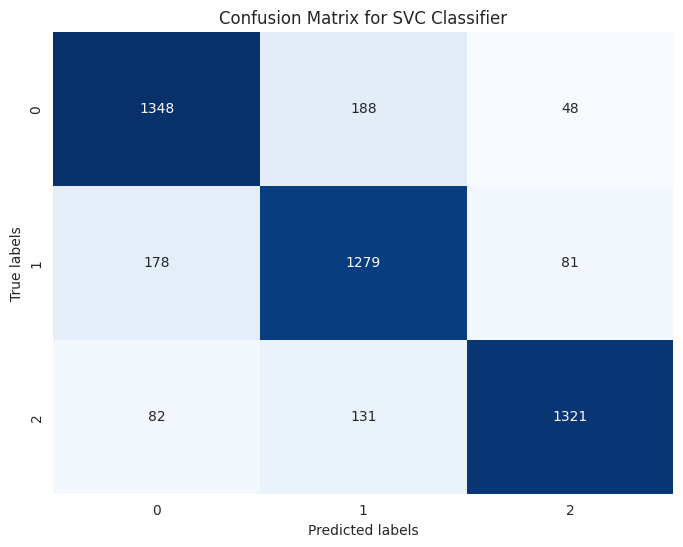

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm_svc = confusion_matrix(y_test, y_pred_svc)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svc, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for SVC Classifier')
plt.show()

**Model Evaluation and Hyperparameter Tuning by creating Pipelines**

In [30]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing steps for numerical features
numeric_features = ['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# Feature Selection
# SelectKBest with f_classif score function
selector = SelectKBest(score_func=f_classif)

# Combine preprocessing and feature selection steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)])

# Define models and pipelines
models = {
    'DecisionTree': DecisionTreeClassifier(),
    'RandomForest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier()
}

pipelines = {}
for name, model in models.items():
    pipelines[name] = Pipeline(steps=[('preprocessor', preprocessor),
                                      ('selector', selector),
                                      ('model', model)])

# Define hyperparameters for each model
param_grids = {
    'DecisionTree': {'selector__k': [2, 4, 6]},
    'RandomForest': {'selector__k': [2, 4, 6], 'model__n_estimators': [100, 200, 300]},
    'KNN': {'selector__k': [2, 4, 6], 'model__n_neighbors': [3, 5, 7]}
}

# Perform GridSearchCV for each model
results = {}
for name, pipeline in pipelines.items():
    grid_search = GridSearchCV(pipeline, param_grid=param_grids[name], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    results[name] = grid_search

# Evaluate models
for name, result in results.items():
    print(f"Model: {name}")
    print("Best parameters:", result.best_params_)
    print("Train Accuracy:", result.best_score_)
    y_pred = result.predict(X_test)
    print("Test Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, average='weighted'))
    print("Recall:", recall_score(y_test, y_pred, average='weighted'))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Model: DecisionTree
Best parameters: {'selector__k': 4}
Train Accuracy: 0.9248160958484417
Test Accuracy: 0.9317010309278351
Precision: 0.9316759099431104
Recall: 0.9317010309278351
Confusion Matrix:
 [[1467   78   39]
 [  69 1418   51]
 [  41   40 1453]]
Model: RandomForest
Best parameters: {'model__n_estimators': 200, 'selector__k': 6}
Train Accuracy: 0.949304940202856
Test Accuracy: 0.9568298969072165
Precision: 0.9568021190043522
Recall: 0.9568298969072165
Confusion Matrix:
 [[1509   54   21]
 [  49 1455   34]
 [  19   24 1491]]
Model: KNN
Best parameters: {'model__n_neighbors': 3, 'selector__k': 4}
Train Accuracy: 0.9005963566634707
Test Accuracy: 0.907860824742268
Precision: 0.9080625366933044
Recall: 0.907860824742268
Confusion Matrix:
 [[1460   87   37]
 [ 107 1365   66]
 [  59   73 1402]]


Model: DecisionTree
Accuracy: 93.17%


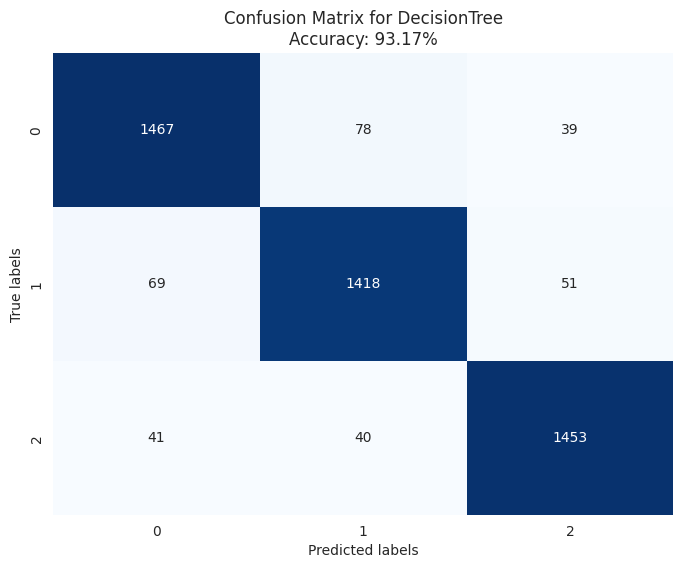

Model: RandomForest
Accuracy: 95.68%


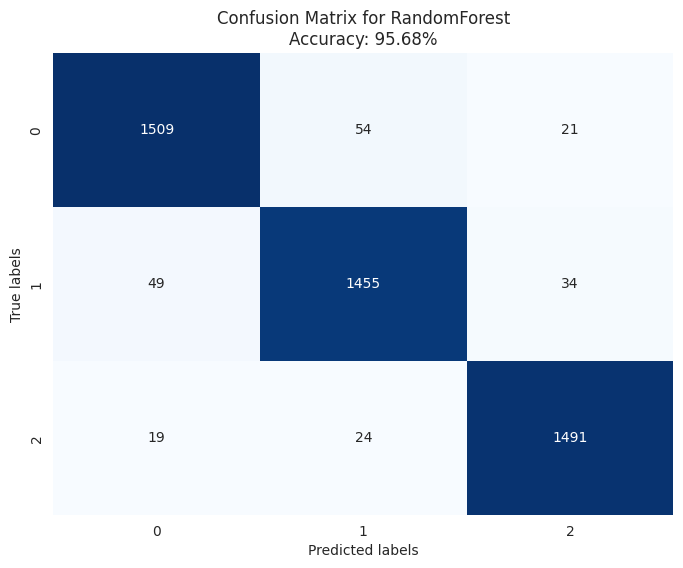

Model: KNN
Accuracy: 90.79%


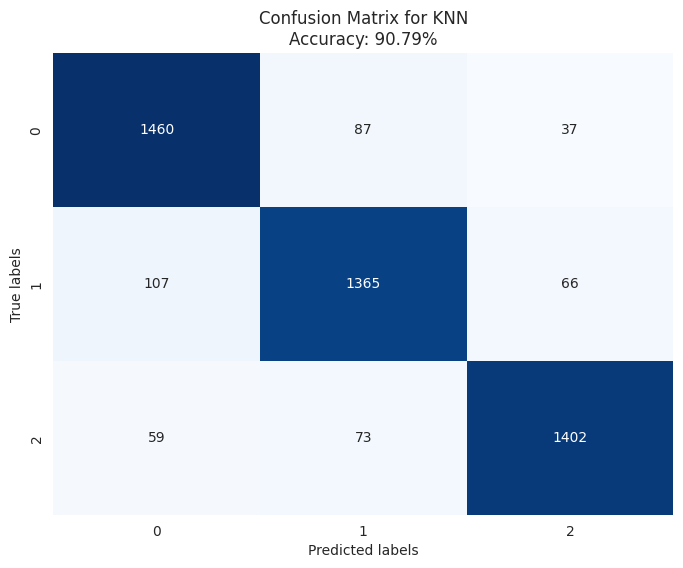

In [32]:

from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluate models
for name, result in results.items():
    print(f"Model: {name}")

    # Get predictions and accuracy
    y_pred = result.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    # Print Accuracy
    print(f"Accuracy: {accuracy:.2%}")

    # Plot Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix for {name}\nAccuracy: {accuracy:.2%}')
    plt.show()


**Model Optimization with CatBoost, LightGBM, and Stacking Ensemble**

In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.utils.class_weight import compute_class_weight
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

# Load dataset
df = pd.read_csv('/content/liver_cirrhosis.csv')

# Define features and target
X = df.drop(columns=['Stage'], axis=1)
y = df['Stage'].astype(str)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Compute class weights
unique_labels = np.unique(y_train)
try:
    class_weights = compute_class_weight(class_weight='balanced', classes=unique_labels, y=y_train)
    class_weights = dict(zip(unique_labels, class_weights))
except Exception as e:
    print("Error computing class weights:", e)
    class_weights = None

# Preprocessing
numeric_features = [
    'N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
    'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin'
]

numeric_features = [f for f in numeric_features if f in X.columns]

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=1, include_bias=False))
])

selector = SelectKBest(score_func=f_classif)
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features)])

# Models
lgbm = LGBMClassifier(class_weight='balanced', force_col_wise=True)
catboost = CatBoostClassifier(silent=True, class_weights=class_weights, task_type="CPU")

# Pipelines
pipelines = {
    'LightGBM': Pipeline(steps=[('preprocessor', preprocessor), ('selector', selector), ('model', lgbm)]),
    'CatBoost': Pipeline(steps=[('preprocessor', preprocessor), ('selector', selector), ('model', catboost)])
}

# Hyperparameter Grids
param_grids = {
    'LightGBM': {'selector__k': [4, 6, 8], 'model__num_leaves': [31, 50], 'model__max_depth': [-1, 5, 10]},
    'CatBoost': {'selector__k': [4, 6, 8], 'model__iterations': [100, 200], 'model__depth': [4, 6, 8]}
}

# Perform RandomizedSearchCV
results = {}
for name, pipeline in pipelines.items():
    try:
        print(f"Training {name} model...")
        random_search = RandomizedSearchCV(pipeline, param_distributions=param_grids[name],
                                           n_iter=10, cv=3, scoring='accuracy', random_state=42)
        random_search.fit(X_train, y_train)
        results[name] = random_search
    except Exception as e:
        print(f"Error with model {name}: {e}")

# Print Results
for name, result in results.items():
    print(f"Best parameters for {name}: {result.best_params_}")
    print(f"Best score for {name}: {result.best_score_}")


Training LightGBM model...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Total Bins 699
[LightGBM] [Info] Number of data points in the train set: 13333, number of used features: 4
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Total Bins 693
[LightGBM] [Info] Number of data points in the train set: 13333, number of used features: 4
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Total Bins 689
[LightGBM] [Info] Number of data points in the train set: 13334, number of used features: 4
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Total Bins 1132
[LightGBM] [Info] Number of data points in the train set: 13333, number of used features: 6
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Total Bins 1127
[LightGBM] [Info] Number of data points in the train set: 13333, number of used features: 6
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Total Bins 1117
[LightGBM] [Info] Number of data points in the train set: 13334, number of used features: 6
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Total Bins 1397
[LightGBM] [Info] Number of data points in the train set: 13333, number of used features: 8
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Total Bins 1394
[LightGBM] [Info] Number of data points in the train set: 13333, number of used features: 8
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Total Bins 1381
[LightGBM] [Info] Number of data points in the train set: 13334, number of used features: 8
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Total Bins 1397
[LightGBM] [Info] Number of data points in the train set: 13333, number of used features: 8
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Total Bins 1394
[LightGBM] [Info] Number of data points in the train set: 13333, number of used features: 8
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Total Bins 1381
[LightGBM] [Info] Number of data points in the train set: 13334, number of used features: 8
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Total Bins 699
[LightGBM] [Info] Number of data points in the train set: 13333, number of used features: 4
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Total Bins 693
[LightGBM] [Info] Number of data points in the train set: 13333, number of used features: 4
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Total Bins 689
[LightGBM] [Info] Number of data points in the train set: 13334, number of used features: 4
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Total Bins 1132
[LightGBM] [Info] Number of data points in the train set: 13333, number of used features: 6
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Total Bins 1127
[LightGBM] [Info] Number of data points in the train set: 13333, number of used features: 6
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Total Bins 1117
[LightGBM] [Info] Number of data points in the train set: 13334, number of used features: 6
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Total Bins 1132
[LightGBM] [Info] Number of data points in the train set: 13333, number of used features: 6
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Total Bins 1127
[LightGBM] [Info] Number of data points in the train set: 13333, number of used features: 6
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Total Bins 1117
[LightGBM] [Info] Number of data points in the train set: 13334, number of used features: 6
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Total Bins 699
[LightGBM] [Info] Number of data points in the train set: 13333, number of used features: 4
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Total Bins 693
[LightGBM] [Info] Number of data points in the train set: 13333, number of used features: 4
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Total Bins 689
[LightGBM] [Info] Number of data points in the train set: 13334, number of used features: 4
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Total Bins 1397
[LightGBM] [Info] Number of data points in the train set: 13333, number of used features: 8
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Total Bins 1394
[LightGBM] [Info] Number of data points in the train set: 13333, number of used features: 8
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Total Bins 1381
[LightGBM] [Info] Number of data points in the train set: 13334, number of used features: 8
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Total Bins 1397
[LightGBM] [Info] Number of data points in the train set: 13333, number of used features: 8
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Total Bins 1394
[LightGBM] [Info] Number of data points in the train set: 13333, number of used features: 8
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Total Bins 1381
[LightGBM] [Info] Number of data points in the train set: 13334, number of used features: 8
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Total Bins 1401
[LightGBM] [Info] Number of data points in the train set: 20000, number of used features: 8
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
Training CatBoost model...
Best parameters for LightGBM: {'selector__k': 8, 'model__num_leaves': 50, 'model__max_depth': -1}
Best score for LightGBM: 0.9587499922933646
Best parameters for CatBoost: {'selector__k': 6, 'model__iterations': 200, 'model__depth': 8}
Best score for CatBoost: 0.9436999797174859


In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Evaluate the LightGBM model
result_lightgbm = results['LightGBM']
y_pred_lightgbm = result_lightgbm.predict(X_test)

print("\nEvaluation results for LightGBM:")
print("Test Accuracy:", accuracy_score(y_test, y_pred_lightgbm))
print("Precision:", precision_score(y_test, y_pred_lightgbm, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_lightgbm, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lightgbm))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



Evaluation results for LightGBM:
Test Accuracy: 0.9606
Precision: 0.9606927694630711
Recall: 0.9606
Confusion Matrix:
 [[1575   64   18]
 [  37 1634   26]
 [  26   26 1594]]


In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Evaluate the LightGBM model
result_lightgbm = results['LightGBM']
y_pred_lightgbm = result_lightgbm.predict(X_test)

print("\nEvaluation results for LightGBM:")
print("Test Accuracy:", accuracy_score(y_test, y_pred_lightgbm))
print("Precision:", precision_score(y_test, y_pred_lightgbm, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_lightgbm, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lightgbm))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



Evaluation results for LightGBM:
Test Accuracy: 0.9606
Precision: 0.9606927694630711
Recall: 0.9606
Confusion Matrix:
 [[1575   64   18]
 [  37 1634   26]
 [  26   26 1594]]


In [10]:
# Evaluate the CatBoost model
result_catboost = results['CatBoost']
y_pred_catboost = result_catboost.predict(X_test)

print("\nEvaluation results for CatBoost:")
print("Test Accuracy:", accuracy_score(y_test, y_pred_catboost))
print("Precision:", precision_score(y_test, y_pred_catboost, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_catboost, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_catboost))



Evaluation results for CatBoost:
Test Accuracy: 0.9538
Precision: 0.9538693963558573
Recall: 0.9538
Confusion Matrix:
 [[1571   59   27]
 [  40 1623   34]
 [  33   38 1575]]


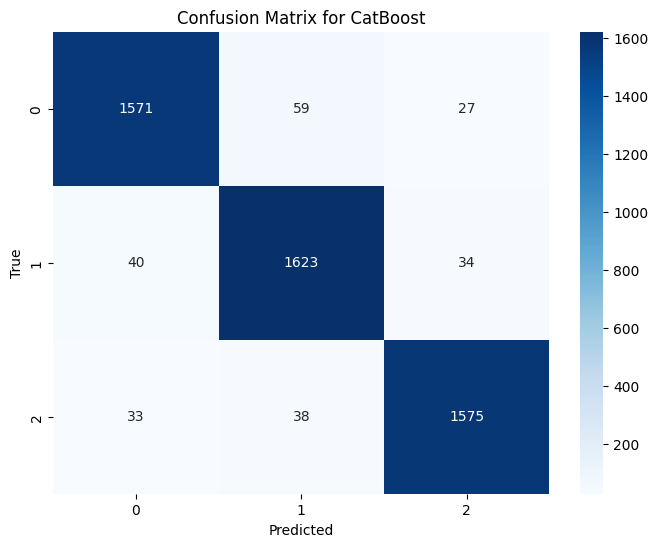

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate the confusion matrix
cm_catboost = confusion_matrix(y_test, y_pred_catboost)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_catboost, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for CatBoost')
plt.show()

In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Load dataset
df = pd.read_csv('/content/liver_cirrhosis.csv')

# Define features and target
X = df.drop(columns=['Stage'], axis=1)
y = df['Stage'].astype(str)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing
numeric_features = [
    'N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
    'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin'
]

numeric_features = [f for f in numeric_features if f in X.columns]

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=1, include_bias=False))
])

selector = SelectKBest(score_func=f_classif)
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features)])

# Logistic Regression Model
logreg = LogisticRegression(class_weight='balanced', max_iter=1000)

# Pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('selector', selector), ('model', logreg)])

# Hyperparameter Grid
param_grid = {
    'selector__k': [4, 6, 8],
    'model__C': [0.1, 1, 10],
    'model__solver': ['liblinear', 'saga']
}

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(pipeline, param_distributions=param_grid, n_iter=10, cv=3, scoring='accuracy', random_state=42)

# Fit the model
random_search.fit(X_train, y_train)

# Print results
print(f"Best parameters for Logistic Regression: {random_search.best_params_}")
print(f"Best score for Logistic Regression: {random_search.best_score_}")

# Evaluate the model
y_pred = random_search.predict(X_test)

print("\nEvaluation results for Logistic Regression:")
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Best parameters for Logistic Regression: {'selector__k': 8, 'model__solver': 'liblinear', 'model__C': 1}
Best score for Logistic Regression: 0.5541001827796399

Evaluation results for Logistic Regression:
Test Accuracy: 0.5624
Precision: 0.5586012416425862
Recall: 0.5624
Confusion Matrix:
 [[ 889  479  289]
 [ 544  777  376]
 [ 259  241 1146]]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Accuracy: 0.9606
Precision: 0.9607
Recall: 0.9606
F1 Score: 0.9606

Confusion Matrix:
[[1575   64   18]
 [  37 1634   26]
 [  26   26 1594]]


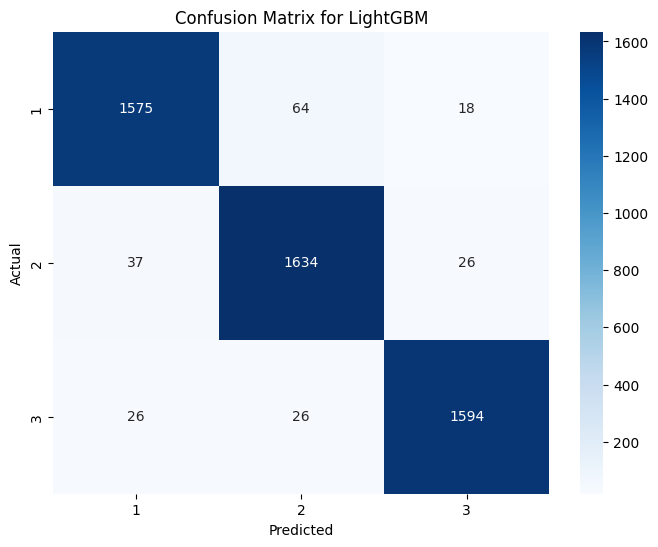

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get the best trained LightGBM model
best_lgbm_model = results['LightGBM'].best_estimator_

# Make predictions with the best LightGBM model
y_pred_lgbm = best_lgbm_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_lgbm)
precision = precision_score(y_test, y_pred_lgbm, average='weighted')
recall = recall_score(y_test, y_pred_lgbm, average='weighted')
f1 = f1_score(y_test, y_pred_lgbm, average='weighted')

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_lgbm)
print("\nConfusion Matrix:")
print(cm)

# Visualizing the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g',
            xticklabels=best_lgbm_model.classes_, yticklabels=best_lgbm_model.classes_)
plt.title('Confusion Matrix for LightGBM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



In [21]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Assuming 'lgbm_model' is the best LightGBM pipeline from RandomizedSearchCV
lgbm_pipeline = results['LightGBM'].best_estimator_

# Example feature values (Ensure all features are present and in the correct order)
input_features = [
    [100, 45, 1.2, 180, 4.0, 1.0, 85, 35, 120, 250000, 13.5]
]

# Convert to DataFrame (if needed) with correct column names
input_features_df = pd.DataFrame(input_features, columns=[
    'N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
    'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin'
])

# Predict using the entire pipeline
predicted_stage = lgbm_pipeline.predict(input_features_df)

print(f"Predicted Stage: {predicted_stage[0]}")


Predicted Stage: 1


In [25]:
input_features = pd.DataFrame([{
    'N_Days': 1230,
    'Status': 'C',
    'Drug': 'Placebo',
    'Age': 19724,
    'Sex': 'F',
    'Ascites': 'Y',
    'Hepatomegaly': 'N',
    'Spiders': 'Y',
    'Edema': 'N',
    'Bilirubin': 0.5,
    'Cholesterol': 219,
    'Albumin': 3.93,
    'Copper': 22,
    'Alk_Phos': 663,
    'SGOT': 45,
    'Tryglicerides': 75,  # Fixed the column name
    'Platelets': 220,
    'Prothrombin': 10.8
}])
predicted_stage = lgbm_model.predict(input_features)
print(f"Predicted Stage: {predicted_stage[0]}")

Predicted Stage: 2


In [27]:
import joblib
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Example: Load a dataset and prepare it
data = load_iris()
X = data.data
y = data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a LightGBM model
train_data = lgb.Dataset(X_train, label=y_train)
params = {'objective': 'multiclass', 'num_class': 3, 'metric': 'multi_logloss'}

model = lgb.train(params, train_data, num_boost_round=100)

# Save the model using LightGBM's built-in save_model
model.save_model('lgbm_model.txt')

# Save the model using joblib (you can also save the model as a Python object)
joblib.dump(model, 'lgbm_model.joblib')

# To load the model using LightGBM's built-in method
loaded_model_lgb = lgb.Booster(model_file='lgbm_model.txt')

# To load the model using joblib
loaded_model_joblib = joblib.load('lgbm_model.joblib')

# You can use the loaded model to make predictions
predictions = loaded_model_joblib.predict(X_test)
print(predictions)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.068098 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 91
[LightGBM] [Info] Number of data points in the train set: 120, number of used features: 4
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.073920
[LightGBM] [Info] Start training from score -1.123930
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furth